In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def selfnorm(x, lim01=True):
    if lim01:
        denom = x.max() - x.min()
        nx = (x - x.min()) / denom
    else:
        denom = np.maximum(np.abs(x.min()), np.abs(x.max()))
        nx = x / denom
        print(denom)
    return nx

In [66]:
# DoG
# data_dir = '/home/yihelu/miniconda3/envs/igibson/lib/python3.8/site-packages/igibson/yihe/records/test/sim_20240502_102857_Rs_int'
data_dir = '/home/yihelu/miniconda3/envs/igibson/lib/python3.8/site-packages/igibson/yihe/records/test/sim_20240503_143254_random'
data_dir = '/home/yihelu/miniconda3/envs/igibson/lib/python3.8/site-packages/igibson/yihe/records/test/sim_20240503_151131_Rs_int'
# raw
# data_dir = '/home/yihelu/miniconda3/envs/igibson/lib/python3.8/site-packages/igibson/yihe/records/test/sim_20240502_111604_Rs_int'


In [67]:
ls_model = 'dimb-ST', 'lamb', 'dimb-RP', 'dimb-DA', 'dimb-add'
n_model = len(ls_model)

In [68]:
data = np.load(os.path.join(data_dir, 'Freight_train_0_record.npz'), allow_pickle='True')
mb_l, mb_r = [data['extra'][()][key] for key in ('mb_l', 'mb_r')]
va = data['va']

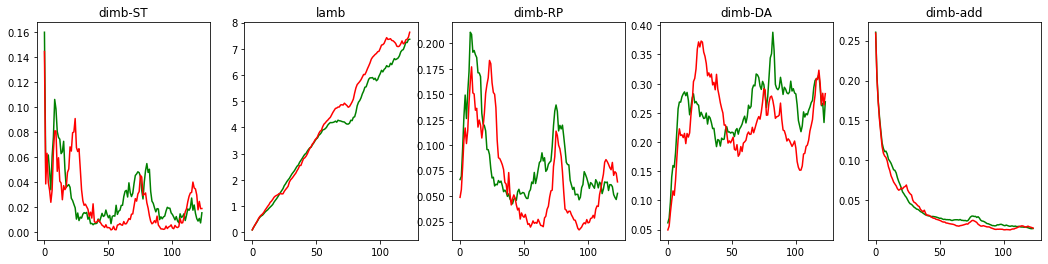

In [71]:
fig, ax = plt.subplots(1, n_model, figsize=(18, 4))
for a, model, l, r in zip(ax, ls_model, mb_l, mb_r):
    a.plot(l[1:], c='g')
    a.plot(r[1:], c='r')
    a.set_title(model)

In [72]:
data = np.load(os.path.join(data_dir, 'Freight_train_1_record.npz'), allow_pickle='True')
mb_l, mb_r = [data['extra'][()][key] for key in ('mb_l', 'mb_r')]

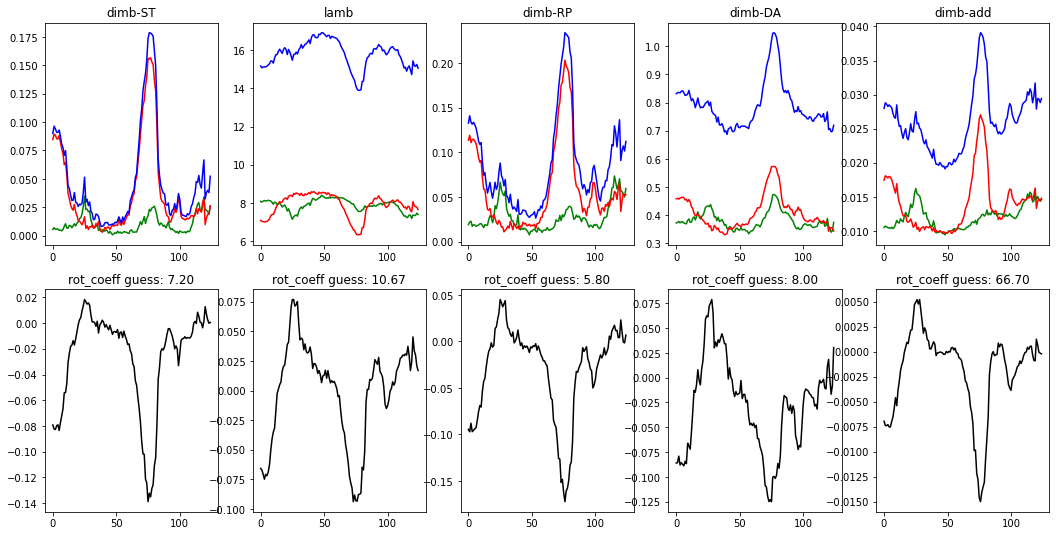

In [73]:
fig, ax = plt.subplots(2, n_model, figsize=(18, 9))
for ar, model, l, r in zip(ax.T, ls_model, mb_l, mb_r):
    ar[0].plot(l, c='g')
    ar[0].plot(r, c='r')
    ar[0].plot(l + r, c='b')
    if model == 'lamb':
        rot = np.divide(r - l, r + l, out=np.zeros_like(r), where=r+l!=0)
    else:
        rot = l - r
    ar[1].plot(rot, c='k')
    ar[1].set_title('rot_coeff guess: {:.2f}'.format(1 / np.max(np.abs(rot))))
    ar[0].set_title(model)

('dimb-ST', 'lamb', 'dimb-RP', 'dimb-DA', 'dimb-add')
0.13882530147213498
0.09372156332957973
0.172335113744441
0.12499497192467107
0.014991714511071135
1.5598141586880645


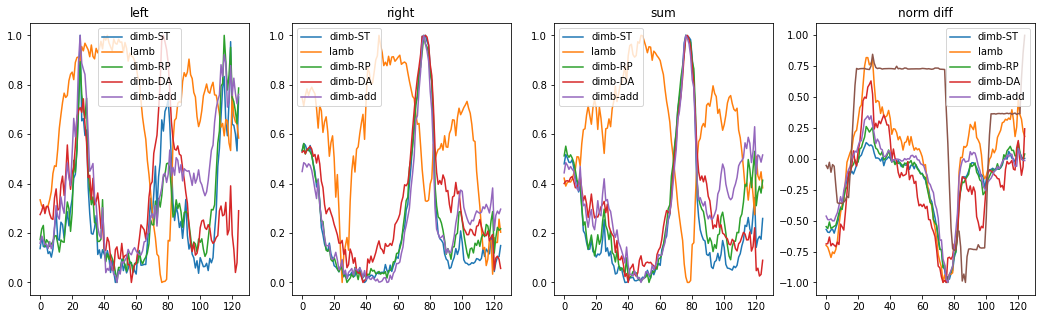

In [74]:
print(ls_model)

fig, ax = plt.subplots(1, 4, figsize=(18, 5))
for model, l, r in zip(ls_model, mb_l, mb_r):
    if model == 'lamb': 
        rot = np.divide(r - l, r + l, out=np.zeros_like(r), where=r+l!=0)
        l, r = r, l
    else:
        rot = l - r
    ax[0].plot(selfnorm(l), label=model)
    ax[1].plot(selfnorm(r), label=model)
    ax[2].plot(selfnorm(l + r), label=model)
    ax[3].plot(selfnorm(rot, False), label=model)
    
ax[3].plot(selfnorm(va, False))

for a, tt in zip(ax, ('left', 'right', 'sum', 'norm diff')):
    a.legend()
    a.set_title(tt)

In [75]:
data = np.load(os.path.join(data_dir, 'Freight_train_2_record.npz'), allow_pickle='True')

In [76]:
mb_l, mb_r = [data['extra'][()][key] for key in ('mb_l', 'mb_r')]

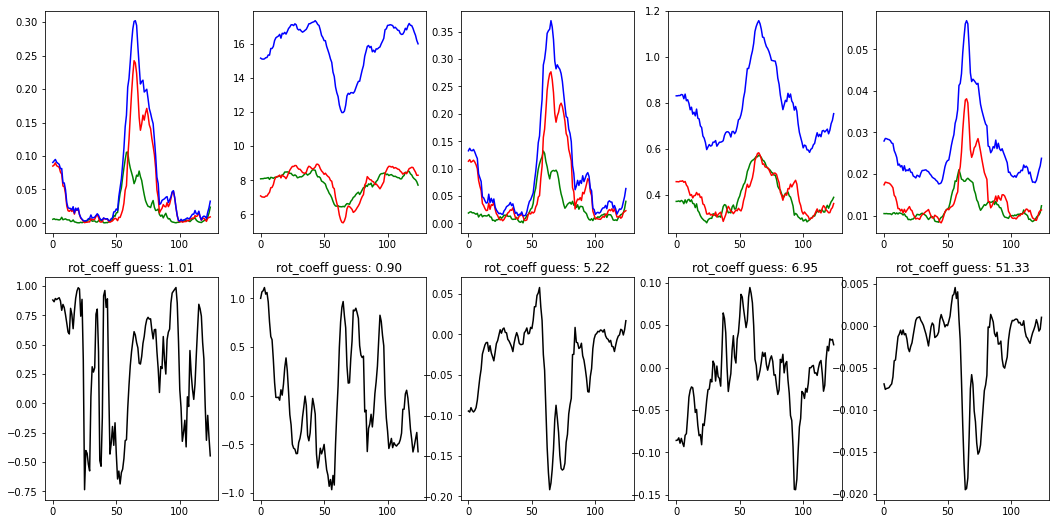

In [77]:
fig, ax = plt.subplots(2, n_model, figsize=(18, 9))
for ar, l, r in zip(ax.T, mb_l, mb_r):
    ar[0].plot(l, c='g')
    ar[0].plot(r, c='r')
    ar[0].plot(l + r, c='b')
    if ar[0] == ax[0, 0]:
        rot = np.divide(r - l, r + l, out=np.zeros_like(r), where=r+l!=0)
    else:
        rot = l - r
    ar[1].plot(rot, c='k')
    ar[1].set_title('rot_coeff guess: {:.2f}'.format(1 / np.max(np.abs(rot))))
    
# ax[0, 0].set_ylim(1, 5)
# ax[0, 1].set_ylim(0, 0.25)
# ax[0, 2].set_ylim(0.2, 1.1)

('dimb-ST', 'lamb', 'dimb-RP', 'dimb-DA', 'dimb-add')
0.1836802361347345
0.08093010458682254
0.19170015415650055
0.1438829263110929
0.019481807228949637


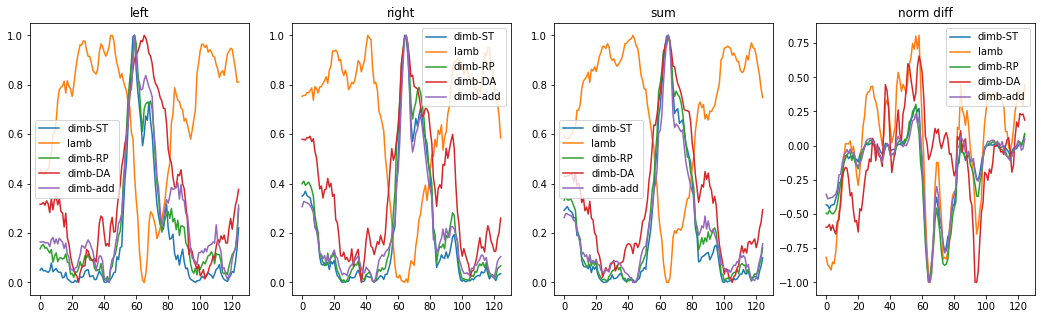

In [78]:
print(ls_model)

fig, ax = plt.subplots(1, 4, figsize=(18, 5))
for model, l, r in zip(ls_model, mb_l, mb_r):
    if model == 'lamb': 
        rot = np.divide(r - l, r + l, out=np.zeros_like(r), where=r+l!=0)
        l, r = r, l
    else:
        rot = l - r
    ax[0].plot(selfnorm(l), label=model)
    ax[1].plot(selfnorm(r), label=model)
    ax[2].plot(selfnorm(l + r), label=model)
    ax[3].plot(selfnorm(rot, False), label=model)
    
for a, tt in zip(ax, ('left', 'right', 'sum', 'norm diff')):
    a.legend()
    a.set_title(tt)

fig, ax = plt.subplots(2, 4, figsize=(18, 9))
for ar, model in zip(ax.T, ls_model):
    data = np.load(os.path.join(data_dir, 'Freight_test_0_{}_record.npz'.format(model)), allow_pickle='True')
    l, r = [data['extra'][()][key] for key in ('mb_l', 'mb_r')]
    ar[0].plot(l, c='g')
    ar[0].plot(r, c='r')
    ar[0].plot(l + r, c='b')
    if ar[0] == ax[0, 0]:
        rot = np.divide(r - l, r + l, out=np.zeros_like(r), where=r+l!=0)
    else:
        rot = l - r
    ar[1].plot(rot, c='k')
    
ax[0, 0].set_ylim(1, 5)
ax[0, 1].set_ylim(0, 0.25)
ax[0, 2].set_ylim(0.2, 1.1)